In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [56]:
import tarfile
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import Planck18 as cosmo
import astropy.units as u

In [73]:
f = 1e-1 * 1e-3 * u.Jy
m = -2.5*np.log10(f.to('Jy').value / 3631)
z = 0.972
dl = cosmo.luminosity_distance(z=z).to(u.pc)
m - 5. * np.log10(dl/(10.*u.pc)).value

-25.183735451261985

In [6]:
grb_tar_dir = 'data/garb_afterglow_lf'

with tarfile.open('data/1307.5939') as tar:
    tar.extractall(grb_tar_dir)
    

In [20]:
tab = """
    990123  &   22  &   1229240    &   1.6 &   0.75    $\pm$   0.07    &   10.2    &   15.4    &   17.3    \\
    021004  &   155 &   2421620 &   2.335   &   0.39            &   15.4    &   16.1    &   16.5    \\
    021211  &   130 &   8957    &   1.01    &   0.69            &   14.1    &   17.8    &   19.3    \\
    030418  &   288 &   7192    &   ... &   ...         &   18.3    &   16.5    &   16.8    \\
    040924  &   950 &   62986   &   0.859   &   0.70            &   17.5    &   17.7    &   18.7    \\
    041006  &   230 &   5577258 &   0.716   &   0.55            &   16.5    &   17.6    &   18.2    \\
    041219A &   441 &   186558  &   ... &   ...         &   ... &   17.2    &   16.9    \\
    050319  &   40  &   994118  &   3.24    &   0.74    $\pm$   0.42    &   16.7    &   18.1    &   19.0    \\
    050401  &   3456    &   1120000 &   2.9 &   0.39    $\pm$   0.05    &   ... &   19.9    &   20.9    \\
    050408  &   3352    &   36710070    &   1.2357  &   0.28    $\pm$   0.33    &   18.3    &   19.6    &   20.3    \\
    050502A &   47  &   17850   &   3.793   &   0.76    $\pm$   0.16    &   13.9    &   17.0    &   18.3    \\
    050525A &   66  &   35638   &   0.606   &   0.97    $\pm$   0.10    &   14.2    &   16.1    &   17.8    \\
    050721  &   1484    &   248596  &   ... &   1.16    $\pm$   0.35    &   ... &   16.8    &   18.6    \\
    050730  &   67  &   72697   &   3.969   &   0.52    $\pm$   0.05    &   15.9    &   16.7    &   17.3    \\
    050801  &   24  &   21652   &   1.56    &   1.00    $\pm$   0.16    &   14.7    &   16.7    &   18.1    \\
    050820A &   230 &   663300  &   2.612   &   0.72    $\pm$   0.03    &   16.5    &   15.2    &   16.7    \\
    050824  &   635 &   8994457 &   0.83    &   0.40    $\pm$   0.04    &   17.1    &   18.5    &   19.2    \\
    050922C &   745 &   606010  &   2.198   &   0.51    $\pm$   0.05    &   14.9    &   15.9    &   16.9    \\
    051021  &   1611    &   35820   &   ... &   0.75            &   17.5    &   18.2    &   18.6    \\
    051109A &   40  &   1040000 &   2.346   &   0.70            &   14.9    &   16.6    &   17.7    \\
    051111  &   32  &   7588    &   1.55    &   0.76    $\pm$   0.07    &   13.7    &   15.7    &   17.2    \\
    060110  &   25  &   4781    &   ... &   0.75            &   12.9    &   14.8    &   15.9    \\
    060111B &   30  &   264806  &   ... &   0.70            &   16.2    &   19.0    &   20.6    \\
    060124  &   3335    &   1980000 &   2.296   &   0.73    $\pm$   0.08    &   ... &   15.4    &   16.7    \\
    060206  &   319 &   201580  &   4.048   &   0.73    $\pm$   0.05    &   15.5    &   17.9    &   19.7    \\
    060210  &   63  &   7190    &   3.91    &   0.37            &   17.8    &   18.1    &   19.7    \\
    060218  &   253 &   2850000 &   0.0331  &   0.75            &   21.0    &   20.1    &   19.6    \\
    060418  &   76  &   7659    &   1.489   &   0.78    $\pm$   0.09    &   13.9    &   15.7    &   17.4    \\
    060512  &   112 &   5927    &   0.4428  &   0.68    $\pm$   0.05    &   15.4    &   17.2    &   18.2    \\
    060526  &   60  &   893550  &   3.21    &   0.51    $\pm$   0.32    &   15.0    &   16.5    &   17.3    \\
    060605  &   74  &   6317    &   3.78    &   1.06            &   15.9    &   15.6    &   17.1    \\
    060607A &   73  &   14733   &   3.082   &   0.72    $\pm$   0.27    &   15.9    &   17.0    &   19.0    \\
    060614  &   1547    &   1276350 &   0.125   &   0.47    $\pm$   0.04    &   20.9    &   20.1    &   19.6    \\
    060729  &   696 &   662390  &   0.54    &   0.78    $\pm$   0.03    &   15.3    &   15.6    &   15.8    \\
    060904B &   21  &   163131  &   0.703   &   1.11    $\pm$   0.10    &   16.8    &   16.4    &   18.9    \\
    060906  &   661 &   13610   &   3.686   &   0.56    $\pm$   0.02    &   20.1    &   18.8    &   19.8    \\
    060908  &   825 &   7242    &   2.43    &   0.30            &   14.7    &   17.5    &   19.0    \\
    060912A &   1100    &   23900   &   0.937   &   0.62            &   ... &   18.0    &   19.3    \\
    060926  &   57  &   1200    &   3.2 &   0.82    $\pm$   0.01    &   16.7    &   19.1    &   ... \\
    060927  &   17  &   1169    &   5.6 &   0.86    $\pm$   0.03    &   16.0    &   16.6    &   18.2    \\
    061007  &   30  &   14599   &   1.261   &   0.78    $\pm$   0.02    &   9.6 &   13.4    &   15.7    \\
    061121  &   49  &   554 &   1.1588  &   0.95            &   11.6    &   12.6    &   14.1    \\
    061126  &   36  &   156381  &   1.1588  &   0.95            &   13.8    &   17.3    &   18.5    \\
    070110  &   662 &   34762   &   1.547   &   0.55    $\pm$   0.04    &   18.6    &   19.0    &   19.2    \\
    070208  &   329 &   13460   &   1.165   &   0.68            &   18.6    &   19.8    &   20.4    \\
    070311  &   74  &   350926  &   ... &   1.00    $\pm$   0.20    &   14.8    &   16.6    &   17.6    \\
    070318  &   61  &   87366   &   0.836   &   0.78            &   15.5    &   15.4    &   17.0    \\
    070411  &   184 &   516628  &   2.954   &   0.75            &   16.5    &   16.6    &   18.1    \\
    070419A &   206 &   62218   &   0.97    &   0.80            &   20.4    &   18.8    &   20.5    \\
    070420  &   116 &   10842   &   ... &   0.75            &   15.6    &   16.2    &   17.4    \\
    070518  &   1069    &   311763  &   1.16    &   0.80            &   18.0    &   19.6    &   20.6    \\
    070611  &   274 &   8867    &   2.04    &   0.73            &   17.7    &   20.1    &   18.6    \\
    071003  &   569 &   5003    &   1.605   &   1.25    $\pm$   0.09    &   13.4    &   17.3    &   18.7    \\
    071010A &   321 &   523226  &   0.98    &   0.68            &   17.0    &   16.7    &   17.7    \\
    071010B &   64  &   174464  &   0.947   &   0.00            &   16.8    &   17.2    &   18.0    \\
    071025  &   175 &   14885   &   ... &   0.42    $\pm$   0.08    &   17.7    &   16.2    &   17.5    \\
    071031  &   287 &   350926  &   2.692   &   0.64    $\pm$   0.01    &   19.5    &   18.1    &   18.8    \\
    071112C &   132 &   69638   &   0.823   &   0.63    $\pm$   0.29    &   17.5    &   18.1    &   19.3    \\
    071122  &   1303    &   9047    &   1.14    &   0.83            &   ... &   20.1    &   19.8    \\
    080310  &   151 &   124416  &   2.4266  &   0.42    $\pm$   0.12    &   17.3    &   16.9    &   17.5    \\
    080319A &   150 &   4462    &   ... &   0.77    $\pm$   0.02    &   21.0    &   20.3    &   21.2    \\
    080319B &   5   &   4590000 &   0.937   &   0.75            &   9.4 &   14.1    &   16.0    \\
    080319C &   78  &   1432    &   1.949   &   0.77    $\pm$   0.02    &   16.8    &   17.4    &   18.7    \\
    080330  &   89  &   116557  &   1.51    &   0.49            &   17.8    &   17.5    &   18.3    \\
    080413A &   7   &   18339   &   2.433   &   0.67            &   14.1    &   16.5    &   18.2    \\
    080413B &   77  &   5185072 &   1.1 &   0.25    $\pm$   0.07    &   16.2    &   18.1    &   18.9    \\
    080506  &   210 &   5371    &   ... &   0.95    $\pm$   0.05    &   16.4    &   17.6    &   18.5    \\
    080603A &   105 &   350436  &   ... &   0.75            &   21.5    &   18.4    &   18.5    \\
    080710  &   417 &   34762   &   0.845   &   0.80    $\pm$   0.09    &   19.1    &   16.9    &   16.7    \\
    080804  &   1160    &   26112   &   2.2 &   0.43            &   ... &   17.9    &   19.2    \\
    080810  &   38  &   7898    &   3.35    &   0.44            &   12.6    &   14.7    &   16.4    \\
    080913  &   576 &   870036  &   6.7 &   0.79    $\pm$   0.03    &   19.3    &   21.7    &   23.1    \\
    080928  &   390 &   13425   &   1.692   &   1.08    $\pm$   0.02    &   18.7    &   17.0    &   17.2    \\
    081008  &   109 &   184525  &   1.692   &   1.08    $\pm$   0.02    &   17.0    &   17.4    &   18.7    \\
    081029  &   529 &   252674  &   3.85    &   0.00            &   15.6    &   17.4    &   18.0    \\
    081109A &   169 &   66600   &   ... &   0.75            &   17.8    &   18.1    &   19.3    \\
    081126  &   102 &   541 &   ... &   0.75            &   15.4    &   15.5    &   16.1    \\
    081203A &   78  &   5758    &   2.1 &   0.60            &   14.0    &   13.1    &   15.2    \\
    090102  &   41  &   264553  &   1.547   &   0.74            &   14.2    &   18.1    &   19.7    \\
    090313  &   205 &   7874700 &   3.375   &   0.71            &   18.8    &   15.8    &   16.8    \\
    090426  &   86  &   10748   &   2.609   &   0.76    $\pm$   0.14    &   16.4    &   18.6    &   19.8    \\
    090510  &   114 &   103794  &   0.903   &   0.76    $\pm$   0.14    &   22.2    &   21.5    &   21.9    \\
    090618  &   76  &   72576   &   0.54    &   0.50            &   13.7    &   15.5    &   16.4    \\
    090726  &   204 &   3015    &   2.71    &   0.75            &   19.1    &   20.7    &   ... \\
    090812  &   27  &   142 &   2.452   &   0.36            &   15.1    &   18.5    &   20.4    \\
    100219A &   936 &   34978   &   0.49    &   0.18            &   16.4    &   19.0    &   20.8    \\
    100418A &   1099    &   1371570 &   ... &   0.75            &   ... &   21.4    &   20.5    \\
    100728B &   159 &   5644    &   ... &   0.75            &   16.3    &   18.8    &   19.7    \\
    100901A &   634 &   543008  &   1.408   &   0.75            &   22.2    &   17.6    &   18.2    \\
    100906A &   51  &   10937   &   1.408   &   0.75            &   13.0    &   14.9    &   16.4    \\
    101024A &   219 &   160000  &   ... &   0.75            &   ... &   19.3    &   19.8    \\
    110205A &   540 &   384000  &   ... &   0.75            &   ... &   14.2    &   16.1    \\
    110213A &   104 &   183368  &   ... &   0.75            &   15.1 & 14.4    &   14.8
"""

In [59]:
t = np.array([l.replace(' ', '').split('&') for l in tab.replace('\n', '').replace('$\pm$', 'pm').split('\\')])

z = dict()
M = dict()
Mabs = dict()
ts = ['100s', '1000s', '1h']
iss = [5, 6, 7]
for i, it in zip(iss, ts):
    tm = t[:, 3] != '...'
    Mm = t[:, i] != '...'
    m = tm & Mm
    z[it] = t[m][:, 3].astype(float)
    M[it] = t[m][:, i].astype(float)
    
    dl = cosmo.luminosity_distance(z=z[it]).to(u.pc)
    Mabs[it] = M[it] - 5. * np.log10(dl/(10.*u.pc)).value


In [64]:
med = {float(k.strip('s')) if 's' in k else float(k.strip('h'))*3600: np.median(mm) for k, mm in Mabs.items()}

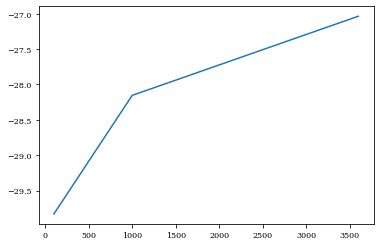

In [67]:
plt.plot(list(med.keys()), list(med.values()))

In [32]:
ascii.read(tab, names=['name', 'start', 'end', 'z', 'beta', 'M100', 'M1000', 'M1h'],
          format='latex')

InconsistentTableError: Could not find table start

In [14]:
with open(grb_tar_dir + '/ms.tex', 'rb') as f:
    texfile = f.read().decode()
    
pre_table = """
    \clearpage
    \begin{deluxetable}{llllllllll}
    %\rotate
    \tablewidth{500pt} %\tabletypesize{\tiny}
    \tablecaption{The temporal coverage of the lightcurves, redshifts, spectral indices, apparent magnitudes at selected epochs for 93 GRBs that have well-sampled early optical lightcurves}
    \tablenum{1} \tablehead{ \colhead{GRB}  &\colhead{$T_{\rm start}$(s)}
    &\colhead{$T_{\rm end}$(s)} &\colhead{$z$} &\colhead{$\beta_{\rm O}$}
     &\colhead{$M_{\rm R, 10^2{\rm s}}$} &\colhead{$M_{\rm R, 10^3{\rm s}}$} &\colhead{$M_{\rm R, 1{\rm h}}$}}
    \startdata
"""

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 63989: invalid start byte

In [ ]:
texfile.split(pre_table)[-1]